# 붓꽃 이진 분류
- 꽃 잎, 꽃 받침의 크기를 보고 붓꽃의 종류를 분류
- iris : bunch type의 데이터구조(임의의 데이터들을 하나로 묶어 저장하는데 유용)
    * feature_names : 속성들의 이름을 제공
    * target_names : 타겟 변수(꽃의 종류)

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
print(type(iris)) 

<class 'sklearn.utils.Bunch'>


In [2]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


- iris.data : feature들의 값
- iris.target : 0(setosa), 1(versicolor), 2(virginica)

In [4]:
X, y = iris.data, iris.target
print(X.shape, type(X))           
print(y.shape, type(y))           

(150, 4) <class 'numpy.ndarray'>
(150,) <class 'numpy.ndarray'>


In [5]:
print(X[0:3])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


In [6]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


- 앞의 2개 특성만(꽃받침<sepal>의 길이와 넓이)

In [7]:
X2 = X[:, :2]

In [8]:
print(X2[0:3])

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]]


데이터 확인
--

Text(0, 0.5, 'Sepal width')

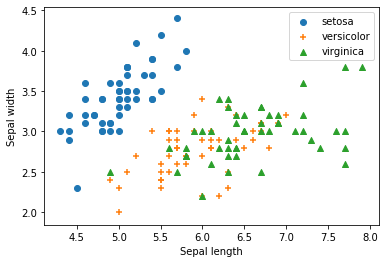

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

markers = ['o', '+', '^']
for i in range(3):
    xs = X2[:, 0][y == i]
    ys = X2[:, 1][y == i]
    plt.scatter(xs, ys, marker=markers[i])
plt.legend(iris.target_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

- 위의 그림에서는 주어진 데이터의 속성 4개를 다 사용하지 않고
- 앞의 2개의 속성에 대해서만 target값들을 표시해 보았다.
- 학습에 사용할 속성으로 2개만 사용한 이유는
- 2차원 평면이 보기 편하도록 하기 위한 것일 뿐이다.

- 위의 그림을 보면 setosa 부류와 그 이외의 부류와는 쉽게 구분할 수 있다는 것을 알 수 있다.
- 직선을 잘 선택하면 두 영역을 쉽게 구분할 수 있다. 
- 이를 달리 표현하면 선형 모델로도 잘 나누어질 것으로 보인다.

- 이제 타겟 변수를 3개(0, 1, 2)로 나누어진 것을
- setosa 부류(target=0), setosa가 아닌 부류(target=1)의 이진 분류문제로 바꾸어 보겠다.
- 이를 위해 target=2 인 것을 모두 1로 바꾸어 사용한다.

In [13]:
y2 = y.copy()              # y의 복사본을 만든다
y2[(y2==2)] = 1 # y중에 2의 값을 모두 1로 바꾼다
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

- train_test_split() : 훈련 데이터, 시험 데이터로 분리

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.5)

Text(0, 0.5, 'Sepal width')

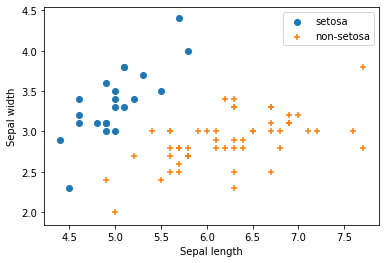

In [15]:
markers = ['o', '+', '^']
for i in range(3):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i])
binary_names = ['setosa', 'non-setosa']
plt.legend(binary_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

## 최적화 알고리즘 선택 : 경사하강법(SGDClassifier, Stochastic Gradient Descent)

In [27]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(max_iter=1000)
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

선형 분류
---
- x : 꽃받침의 길이, y : 꽃받침의 폭
- ax+by+c > 0
- y > (-a/b)x-c/b

In [28]:
clf.coef_, clf.intercept_

(array([[ 113.43075852, -163.88308977]]), array([-91.903888]))

In [29]:
a = clf.coef_[0,0]
b = clf.coef_[0,1]
c = clf.intercept_
print(a, b, c)
## 103.189493433 –172.607879925 -35.2970136277

113.43075852470373 -163.88308977035425 [-91.903888]


#### 1차 선형분류 판별식
- ax+by+c > 0
- y > (-a/b)x - c/b

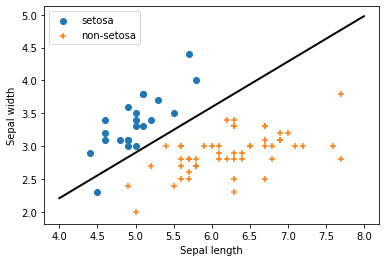

In [30]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

markers = ['o', '+', '^']
for i in range(2):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i])

binary_names = ['setosa', 'non-setosa']
plt.legend(binary_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

XX = np.linspace(4, 8, 40)
# 결정 경계선
plt.plot(XX, (-a/b)*XX - c/b, "k-", linewidth=2)

### 임의의 샘플에 대해 분류 예측
- 입력 : 꽃받침의 길이, 폭 
- clf : 예측 수행 모델 : 
- predict() : 예측 수행 함수

In [31]:
print(clf.predict([[4.5, 3.5]]))  # 0

[0]


In [32]:
print(clf.predict([[6.5, 2.5]]))  # 1

[1]


- 위의 꽃받침의 길이와 폭 속성 그래프 상에서 위의 두 점의 좌표 위치를 보면
- 대략 어떤 클래스에 해당할 지 눈으로 봐도 알 수 있다.

### 이제 test 데이터에 대해서 예측을 모두 시행하고, 정확도를 구해 본다.
- score(X, y) 

- X2 : 전체 데이터 (X_train + X_test)
- X_train : 훈련 데이터
- X_test : 테스트 데이터

In [33]:
print(clf.score(X2, y2))

0.9933333333333333


In [34]:
print(clf.score(X_test, y_test))

1.0


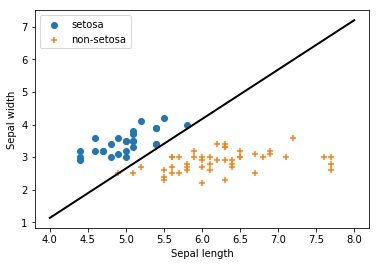

In [21]:
for i in range(2):
    xs = X_test[:, 0][y_test == i]
    ys = X_test[:, 1][y_test == i]
    plt.scatter(xs, ys, marker=markers[i])

binary_names = ['setosa', 'non-setosa']
plt.legend(binary_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

XX = np.linspace(4, 8, 40)
# 결정 경계선
plt.plot(XX, (-a/b)*XX - c/b, "k-", linewidth=2)

In [35]:
# from sklearn.cross_validation import cross_val_score, KFold
from sklearn.model_selection import cross_val_score, KFold

# cv = KFold(X2.shape[0], 5, shuffle=True)
cv = KFold(5, shuffle=True)
print(cross_val_score(clf, X2, y2, cv=cv))

[1.         1.         0.96666667 1.         0.86666667]


## 4개 속성 모두 이용
### 3가지 꽃 구분

In [23]:
from sklearn import datasets
# from sklearn.model_cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf_all = SGDClassifier(max_iter=1000)
clf_all.fit(X_train, y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
clf_all.score(X_test, y_test)

0.9555555555555556

In [25]:
# cv = KFold(X.shape[0], 5,shuffle=True)
cv = KFold(5,shuffle=True)
print(cross_val_score(clf_all, X, y, cv=cv))

[0.96666667 0.96666667 0.76666667 0.96666667 0.73333333]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassif